# 【例9.1】使用感知器Perceptron进行信用分类。

Step1:read data...
Step2:fit by Perceptron...
Step3:get the weights and bias...
  权重为： [[ 8.52 -8.45]] 
  截距为： [0.]
Step4:compute the accuracy...
  精确度：100.00
Step5:draw with the weights and bias...


C:\Users\52257\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


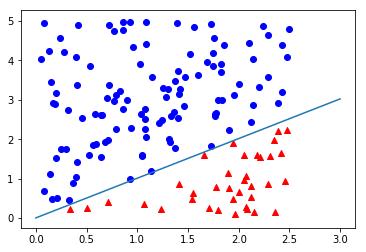

In [3]:
# -*- encoding:utf-8 -*-
from sklearn.linear_model import Perceptron
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def loaddata(): 
    people = pd.read_csv("credit-overdue.csv", header=0) # 加载数据集
    X = people[['debt','income']].values
    y = people['overdue'].values
    return X,y 

print("Step1:read data...")
x,y=loaddata() 

#拆分为训练数据和测试数据
print("Step2:fit by Perceptron...")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

#将两类值分别存放、以便显示
positive_x1=[x[i,0]for i in range(len(y)) if y[i]==1]
positive_x2=[x[i,1]for i in range(len(y)) if y[i]==1]
negetive_x1=[x[i,0]for i in range(len(y)) if y[i]==0]
negetive_x2=[x[i,1]for i in range(len(y)) if y[i]==0] 

#定义感知机
clf=Perceptron(n_iter=100)
clf.fit(x_train,y_train)
print("Step3:get the weights and bias...")

#得到结果参数
weights=clf.coef_
bias=clf.intercept_
print('  权重为：',weights,'\n  截距为：',bias)
print("Step4:compute the accuracy...")    

#使用测试集对模型进行验证
acc=clf.score(x_test,y_test)
print('  精确度：%.2f'%(acc*100.0))
 
#绘制两类样本散点图
print("Step5:draw with the weights and bias...")
plt.scatter(positive_x1,positive_x2, marker='^',c='red')
plt.scatter(negetive_x1,negetive_x2,c='blue')

#显示感知机生成的分类线 
line_x=np.arange(0,4)
line_y=line_x*(-weights[0][0]/weights[0][1])-bias
plt.plot(line_x,line_y)
plt.show()

# 【例9.2】SVC对随机数据集进行训练。

参数w:  [-0.63431181  0.56164532]
参数a:  1.1293814568082807
支持向量:  [[ 0.67303506 -1.36752439]
 [-1.09435005  0.19738984]]
参数coef_:  [[-0.63431181  0.56164532]]


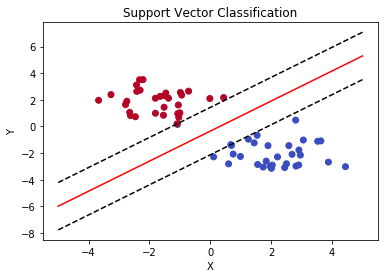

In [4]:
# -*- coding: utf-8 -*-
from sklearn import svm
import numpy as np
from matplotlib import pyplot as plt

# 随机生成两组数据，并通过(-2,2)距离调整为明显的0/1两类
data = np.r_[np.random.randn(30,2)-[-2,2],np.random.randn(30,2)+[-2,2]]
target = [0] * 30 + [1] * 30

# 建立SVC模型
clf = svm.SVC(kernel='linear')
clf.fit(data, target)

# 显示结果
w = clf.coef_[0] 
a = -w[0] / w[1]
print("参数w: ", w)
print("参数a: ", a)
print("支持向量: ", clf.support_vectors_)
print("参数coef_: ", clf.coef_)

# 使用结果参数生成分类线
xx = np.linspace(-5,5)
yy = a * xx - (clf.intercept_[0] / w[1]) 

# 绘制穿过正支持向量的虚线
b = clf.support_vectors_[0]
yy_Neg = a* xx +(b[1] - a*b[0])

# 绘制穿过负支持向量的虚线
b = clf.support_vectors_[-1]
yy_Pos = a* xx +(b[1] - a*b[0])

# 绘制黑色实线
plt.plot(xx, yy, 'r-')
# 绘制黑色虚线
plt.plot(xx, yy_Neg, 'k--')
plt.plot(xx, yy_Pos, 'k--')

# 绘制样本散点图
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.coolwarm)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Support Vector Classification")

plt.show()

# 【例9.3】使用SVC进行数据分类预测。

In [6]:
# -*- coding: utf-8 -*-
from sklearn import svm

# 样本特征
x = [[2, 0], [1, 1], [2, 3]]
# 样本的标签
y = [0, 0, 1]

# 建立SVC分类器
clf = svm.SVC(kernel='linear')
# 训练模型
clf.fit(x, y)
print(clf)

# 获得支持向量
print(clf.support_vectors_)

# 获得支持向量点在原数据中的下标
print(clf.support_)

# 获得每个类支持向量的个数
print(clf.n_support_)

# 预测(2,0)的类别
print( clf.predict( [[2, 0]] ) )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[1. 1.]
 [2. 3.]]
[1 2]
[1 1]
[0]


# 【例9.4】SVM能否解决异或问题？

In [7]:
# -*- coding: utf-8 -*-
from sklearn import svm

# 样本特征
x = [[0, 0], [0, 1], [1, 0], [1,1]]
# 样本的标签
y = [0, 1, 1, 0]

# 建立SVC分类器
clf = svm.SVC(kernel='rbf')
# 训练模型
clf.fit(x, y)

# 分别预测4个样本点的类别
print('样本[0, 0]的预测结果为：', clf.predict( [[0, 0]] ) )
print('样本[0, 1]的预测结果为：',clf.predict( [[0, 1]] ) )
print('样本[1, 0]的预测结果为：',clf.predict( [[1, 0]]))
print('样本[1, 1]的预测结果为：',clf.predict( [[1, 1]] ) )

样本[0, 0]的预测结果为： [0]
样本[0, 1]的预测结果为： [1]
样本[1, 0]的预测结果为： [1]
样本[1, 1]的预测结果为： [0]


# 9.3 本章实验
###  一、SVM解决非线性分类问题

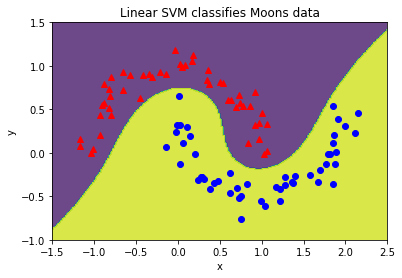

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# 生成半环形数据
X, y = make_moons(n_samples=100, noise=0.1, random_state=1)
moonAxe=[-1.5, 2.5, -1, 1.5]      #moons数据集的区间

# 显示数据样本
def dispData(x, y, moonAxe):
    pos_x0=[x[i,0]for i in range(len(y)) if y[i]==1]
    pos_x1=[x[i,1]for i in range(len(y)) if y[i]==1]
    neg_x0=[x[i,0]for i in range(len(y)) if y[i]==0]
    neg_x1=[x[i,1]for i in range(len(y)) if y[i]==0] 

    plt.plot(pos_x0, pos_x1, "bo")
    plt.plot(neg_x0, neg_x1, "r^")
    
    plt.axis(moonAxe)
    plt.xlabel("x")
    plt.ylabel("y")

# 显示决策线
def dispPredict(clf, moonAxe):
    #生成区间内的数据
    d0 = np.linspace(moonAxe[0], moonAxe[1], 200)
    d1 = np.linspace(moonAxe[2], moonAxe[3], 200)
    x0, x1 = np.meshgrid(d0,d1)
    X = np.c_[x0.ravel(), x1.ravel()]
    #进行预测并绘制预测结果
    y_pred = clf.predict(X).reshape(x0.shape)   
    plt.contourf(x0, x1, y_pred, alpha=0.8)

# 1.显示样本    
dispData(X, y, moonAxe)
# 2.构建模型组合，整合三个函数
polynomial_svm_clf=Pipeline(
                             (("multiFeature",PolynomialFeatures(degree=3)),
                              ("NumScale",StandardScaler()),
                              ("SVC",LinearSVC(C=100)))
                           )

# 3.使用模型组合进行训练
polynomial_svm_clf.fit(X,y)
# 4.显示分类线
dispPredict(polynomial_svm_clf, moonAxe)
# 5.显示图表标题
plt.title('Linear SVM classifies Moons data')
plt.show()

# 二、使用SVM进行信用卡欺诈检测
![givemesomecredit](./data/givemesomecredit.png)

In [10]:
import pandas as pd 
df = pd.read_csv('data/KaggleCredit2.csv')
df.info

<bound method DataFrame.info of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
5                6                 0                              0.213179   
6                7                 0                              0.305682   
7                8                 0                              0.754464   
8                9                 0                              0.116951   
9               10                 0                              0.189169   
10              11                 0                              0.644226   
11              12              

In [11]:
df = df.drop(df.columns[0], axis=1)
df = df[df['age']>70]
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
14,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
16,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
37,0,1.000000,75,1,0.134078,3400.0,1,0,1,0,1.0
41,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0
50,0,0.818978,73,0,3095.000000,0.0,9,0,1,1,0.0
62,0,0.101156,72,0,1720.000000,NaN,12,0,2,0,0.0
91,0,0.023767,83,0,0.123798,10500.0,13,0,0,0,0.0
99,0,0.032618,75,0,0.006799,7500.0,4,0,0,0,0.0
106,0,0.018887,80,0,0.003479,10060.0,5,0,0,0,0.0


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#(1) 载入数据
data = pd.read_csv("data/KaggleCredit2.csv",index_col= 0)
data.dropna(inplace=True)

#(2)对特征列进行标准化
cols = data.columns[1:]
ss = StandardScaler()
data[cols] = ss.fit_transform(data[cols])

#(3)构造数据和标签
X = data.drop('SeriousDlqin2yrs', axis=1) # 数据特征
y = data['SeriousDlqin2yrs']  #标签列

#(4)进行数据切分，测试集占比30%，生成随机数的种子是0
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3 ,random_state = 0)

#(5)构建SVM模型
#只使用特征“NumberOfTime60-89DaysPastDueNotWorse”进行SVM分类
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train[['NumberOfTime60-89DaysPastDueNotWorse']], y_train)
# svm.fit(X_train, y_train)  此句使用的是全部特征，时间耗费长

#(6)进行预测
y_pred_svm = svm.predict(X_test[['NumberOfTime60-89DaysPastDueNotWorse']])
print('预测结果：\n',y_pred_svm)

#在测试集上使得准确度93%
svm.score(X_test[['NumberOfTime60-89DaysPastDueNotWorse']], y_test)

预测结果：
 [0 0 0 ... 0 0 0]


0.9303788697652504